In [3]:
!pip install -Uqq fastai

In [7]:
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
path = untar_data(URLs.PETS)

In [9]:
files = get_image_files(path/"images")


In [10]:
files[0].name

'beagle_115.jpg'

In [11]:
pat = r'^(.*)_\d+.jpg'

In [12]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

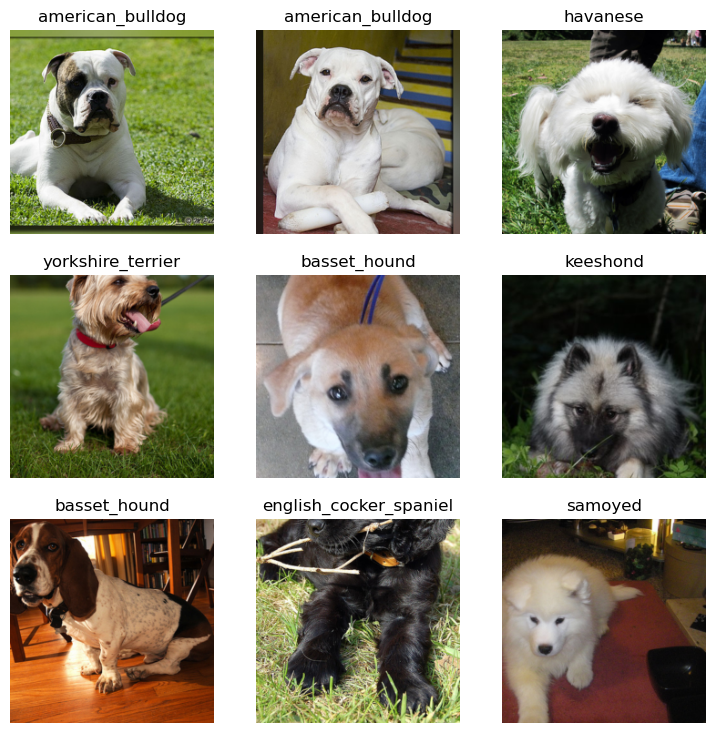

In [13]:
dls.show_batch()

Since classifying the exact breed of cats or dogs amongst 37 different breeds is a harder problem, we will slightly change the definition of our DataLoaders to use data augmentation.

In [14]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),batch_tfms=aug_transforms(size=224))

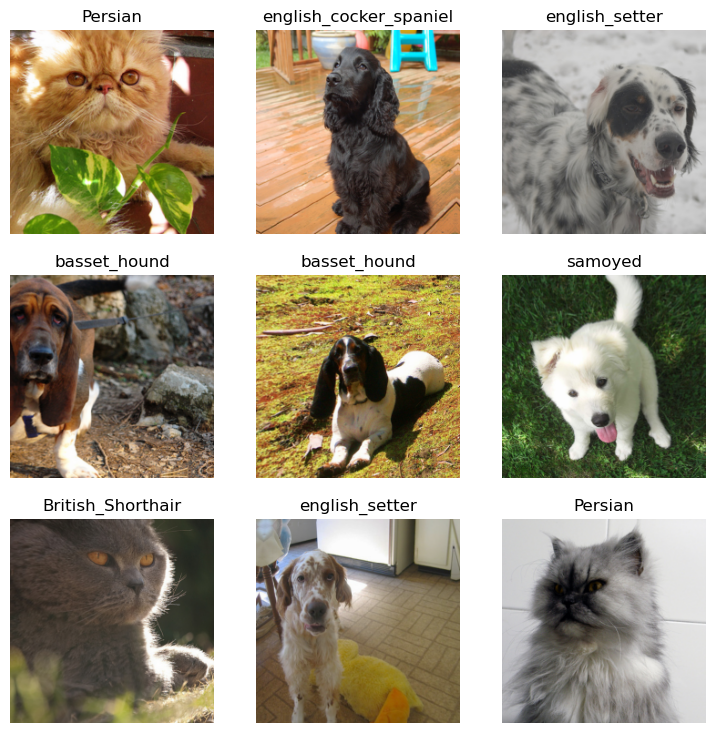

In [15]:
dls.show_batch()

We can then create our learner exactly as before and train our model.

In [16]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 64.8MB/s]


SuggestedLRs(valley=0.0004786300996784121)

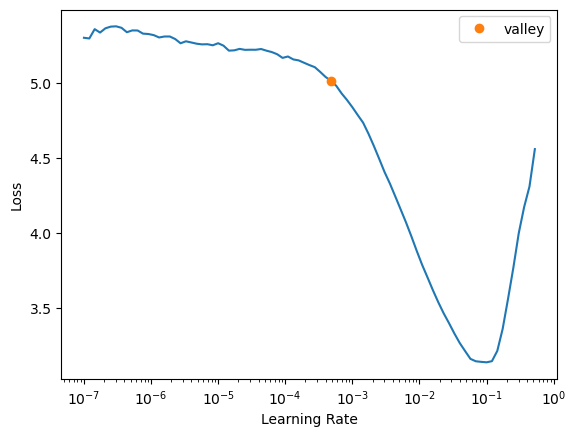

In [17]:
learn.lr_find()

In [18]:
learn.fine_tune(2, 3e-3)

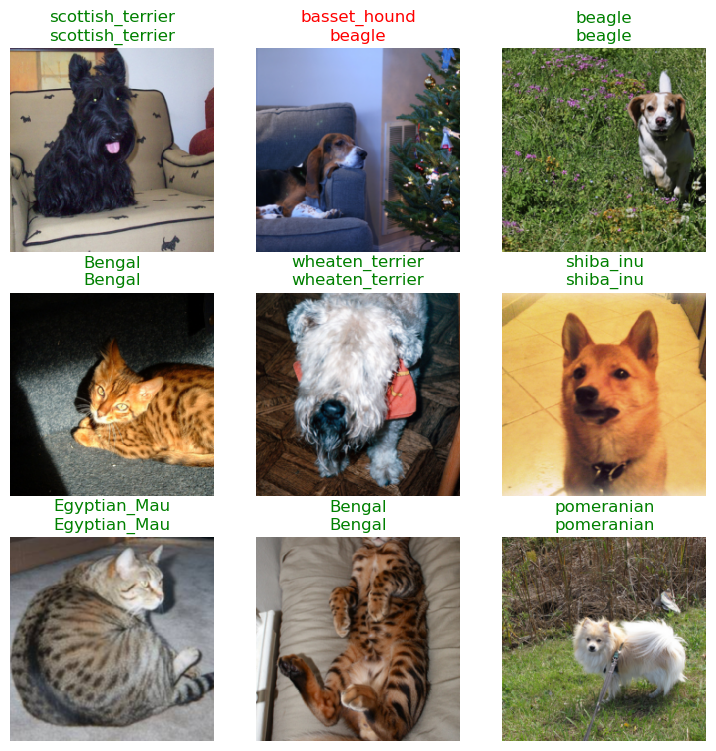

In [19]:
learn.show_results()

In [20]:
interp = Interpretation.from_learner(learn)

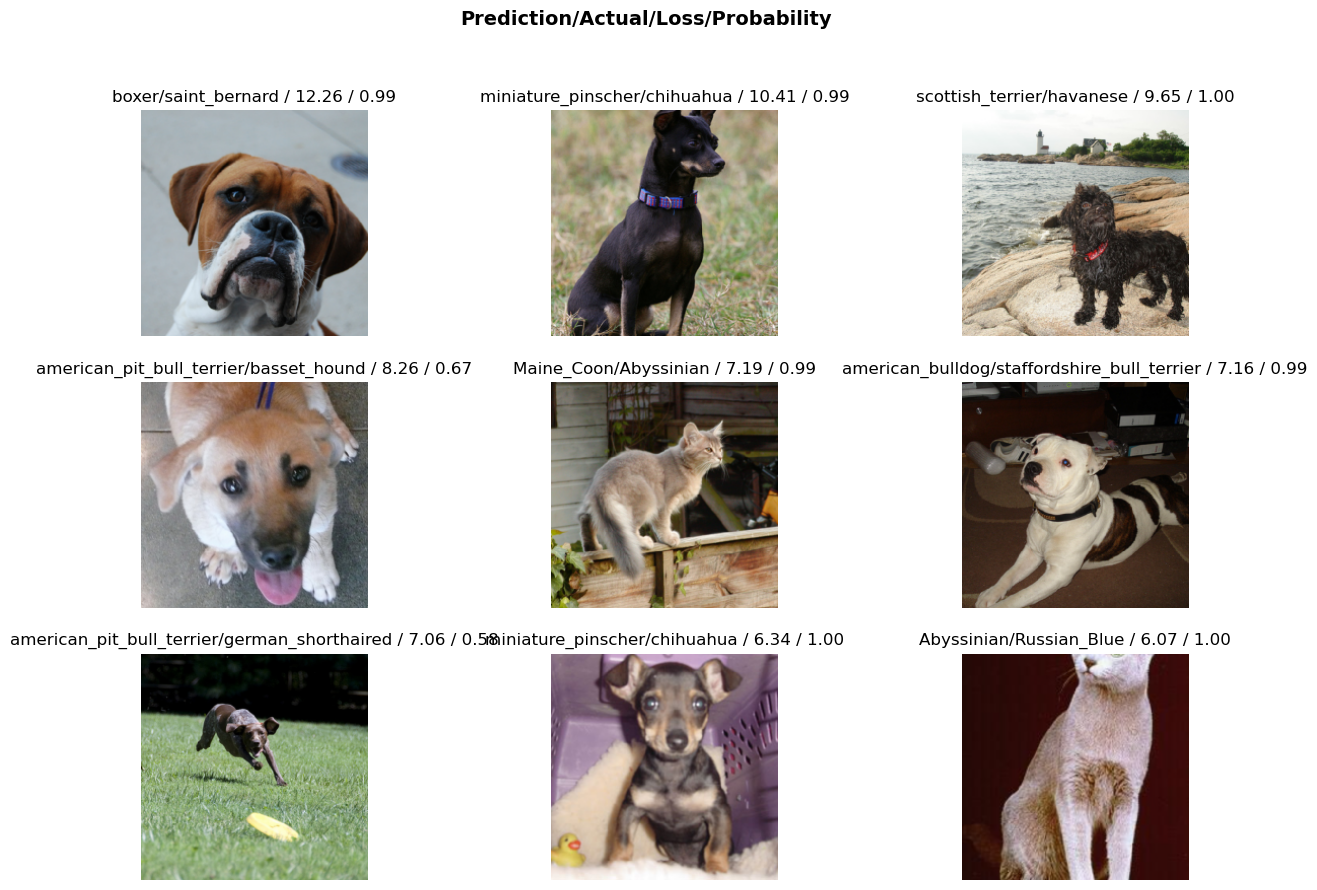

In [21]:
interp.plot_top_losses(9, figsize=(15,10))